By: Camille Porter

Standard statistical methods can have problems in the big-p setting, i.e. much more features than samples. Typical examples for such datasets are biological datasets (e.g. genes) or image datasets (each pixel is a feature).

I explore how classifiers can handle increasing feature space dimension.
I simulate three classes using the make_classification function from sklearn with different numbers of features. We begin with n > p and end with p > n. 

I use Decision Tree, Support Vector Classification (SVC) and Logistic Regression and examine what happens to the accuracy when the number of features increases. 

In [2]:
from sklearn.datasets import make_classification # normally distributed
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np
from sklearn.model_selection import GridSearchCV 

In [3]:
def make_data(n_feat): 
    data_list = []
    for n in n_feat:
        X = "X" + str(n)
        y = "y" + str(n)
        X, y = make_classification(n_samples = 200, n_classes = 3, n_clusters_per_class = 1,
                                n_features = n, n_redundant = 0, n_informative = n,
                                n_repeated = 0, random_state = 6)
    
        data_list.append([X, y])
    return data_list

In [4]:
num_features = [3, 10, 50, 100, 400, 800, 1200, 1600]

data_list = make_data(num_features)
#print(data_list)

<ipython-input-5-2ec5e098bae3>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(subplot_pos[i]))


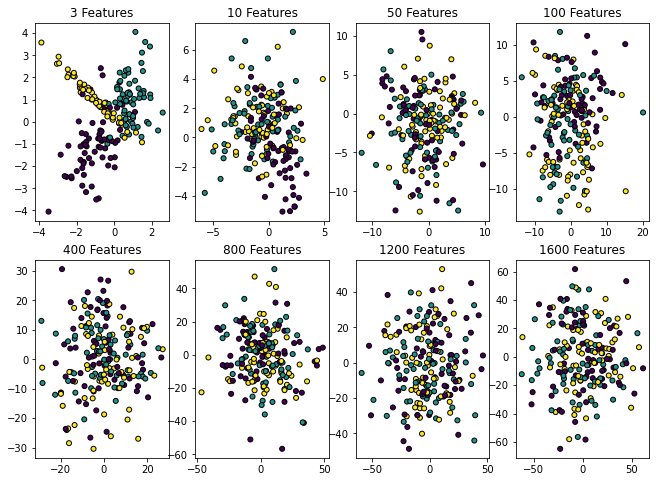

In [5]:
subplot_pos = [241, 242, 243, 244, 245, 246, 247, 248]

plt.figure(figsize=(11,8)) # do first
for i in range(len(data_list)):
    X, y = data_list[i]
    plt.subplot(str(subplot_pos[i]))
    plt.title(str(num_features[i])+ " Features")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [8]:
# Split into training and validation
def data_split(data_list):
    train_test = []
    
    for i in range(len(data_list)):
        X, y = data_list[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        #print(len(y_train), len(y_test))
        train_test.append([X_train, X_test, y_train, y_test])
    return train_test

In [9]:
train_test = data_split(data_list)

## Logistic Regression

In [10]:
def logistic(X_train, y_train, X_test, y_test):
    log_clf = LogisticRegression(max_iter=300)
    log_clf.fit(X_train, y_train)
    test_score = log_clf.score(X_test, y_test)
    train_score = log_clf.score(X_train, y_train)
    return train_score, test_score

In [11]:
logistic_acc= []
logistic_score = []

for i in range(len(train_test)):
    X_train, X_test, y_train, y_test = train_test[i]
    train, test = logistic(X_train, y_train, X_test, y_test)
    logistic_acc.append(test)
    logistic_score.append(train)
print(logistic_acc)

[0.96, 0.78, 0.62, 0.76, 0.6, 0.5, 0.52, 0.5]


In [12]:
def plot_this(classifier, title, acc_list, score_list):
    plt.scatter(num_features, acc_list, label = "testing")
    plt.plot(num_features, acc_list)
    plt.scatter(num_features, score_list, label = "training")
    plt.plot(num_features, score_list)
    plt.xlabel("number of features")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(title)

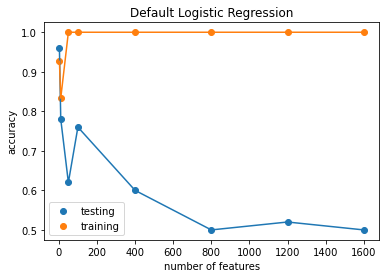

In [13]:
plot_this(logistic, "Default Logistic Regression", logistic_acc, logistic_score)

## Decision Tree

In [14]:
def decision(X_train, y_train, X_test, y_test):
    decision_clf = DecisionTreeClassifier(max_depth = 5) #min_impurity_decrease = .2
    decision_clf.fit(X_train, y_train)
    test_score = decision_clf.score(X_test, y_test)
    train_score = decision_clf.score(X_train, y_train)
    return train_score, test_score

In [15]:
decision_acc= []
decision_score = []

for i in range(len(train_test)):
    X_train, X_test, y_train, y_test = train_test[i]
    train, test = decision(X_train, y_train, X_test, y_test)
    decision_acc.append(test)
    decision_score.append(train)

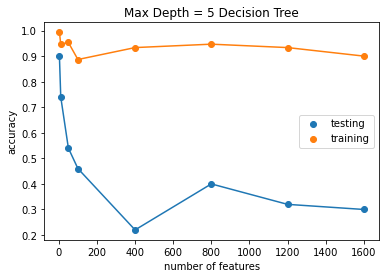

In [16]:
plot_this(logistic, "Max Depth = 5 Decision Tree", decision_acc, decision_score)

## SVC

In [17]:
def grid_search(model, X_train, y_train):
    # defining parameter range 
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
    # fitting the model for grid search 
    grid.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid.best_params_) 
  
    # print how our model looks after hyper-parameter tuning 
    print(grid.best_estimator_) 
    
    grid_predictions = grid.predict(X_test) 
    return grid_predictions

In [18]:
def svc(X_train, y_train, X_test, y_test):
    svc_clf = SVC(random_state = 42) # kernel = 'rbf', C = .1, gamma = .0001 ,
    svc_clf.fit(X_train, y_train)
    test_score = svc_clf.score(X_test, y_test)
    train_score = svc_clf.score(X_train, y_train)
    #predictions = svc_clf.predict(X_test) 
    #print(classification_report(y_test, predictions)) 
    #grid_predictions = grid_search(svc_clf, X_train, y_train)
    return train_score, test_score

In [19]:
svc_acc= []
svc_score = []
#grid_score = []

for i in range(len(train_test)):
    X_train, X_test, y_train, y_test = train_test[i]
    train, test = svc(X_train, y_train, X_test, y_test)
    svc_acc.append(test)
    svc_score.append(train)
    #grid_score.append(grid)

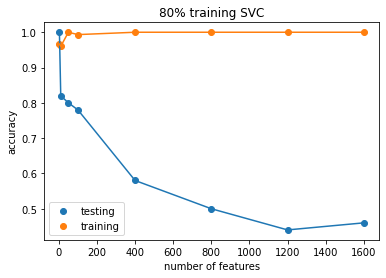

In [20]:
plot_this(logistic, "80% training SVC", svc_acc, svc_score)